# Creating a map of a hospital in Madgeburg


## Import of necessary libraries


In [23]:
# Import osmnx package to download the OSM data
import osmnx as ox

# Import geopandas to handle the geographic data
import geopandas as gpd

# Import the visualiyation package matplotlib to plot the data later
import matplotlib.pyplot as plt

# Import pandas in case we have to do any other data manipulation
import pandas as pd

# set max number of columns and width in this notebook
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)

## Using the osmnx python library to visualize the hospital grounds of Klinikum Marburg

Rather than creating a whole map for the city, which we could at this point, let's start small and focus on the intricate microcosm of the hospital named Klinikum Marburg.

We start by pinpointing the feature of interest using its unique OSM ID 5939200. We could use OSMnx to geocode the id but to be frank, [I just looked it up on OSM](https://www.openstreetmap.org/way/25939200#map=17/52.15746/11.58277).

Creating this mini-map of the hospital grounds boils down to five different steps, which we will follow in chronological order:

1. **Double-check the correct feature:** Again, we use OSMnx's geocoding capabilties to locate and downlad the hospitl (OSM ID 25939200).
2. **Extract Features:** We then gather all features within this boundary from OSM.
3. **Customize Visualization:** Using osmnx, we apply colors to differentiate feature types (buildings in khaki, streets in grey, paths in green).
4. **Plot the Map:** Finally, we plot the map, using colors to distinguish and identify different elements.

---

#### 1. Identify the feature.


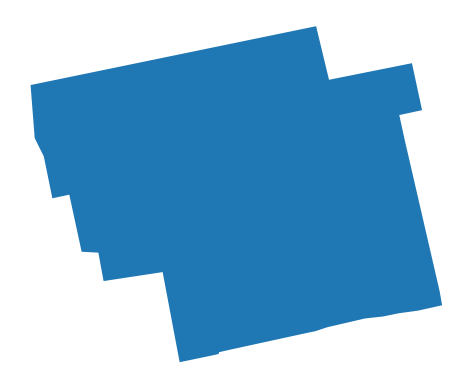

In [3]:
# Use the settings module to configure OSMnx
ox.settings.use_cache = True
ox.settings.log_console = True

# Step 1: Geocode the hospital to get its location, btw. "ox" is short for "osmnx"
hospital = ox.geocode_to_gdf("Klinikum Magdeburg, Magdeburg, Germany")

# Plot the hospital
ax = ox.project_gdf(hospital).plot()

# Turn off the axis - and try to turn it back on later!
_ = ax.axis("off")

### 2. Retrieve the feature's boundary


/tmp/ipykernel_63289/2034693569.py:5: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(use_cache=True, log_console=True)


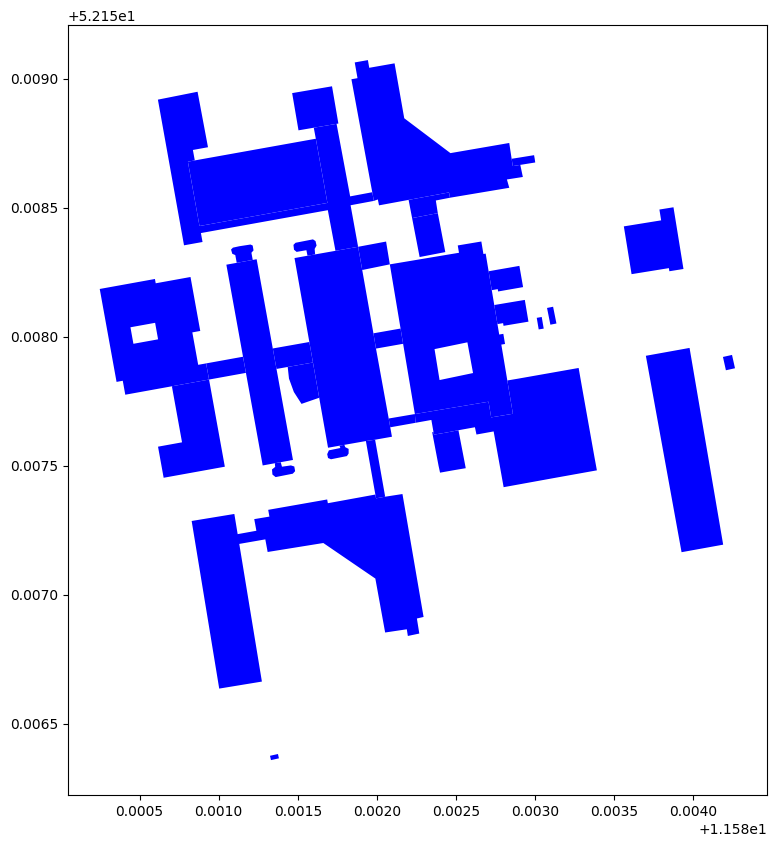

In [4]:
import osmnx as ox
import matplotlib.pyplot as plt

# Configure OSMnx to use cache and log to console
ox.config(use_cache=True, log_console=True)

# Define the place query and the types of features you're interested in
place_query = "Klinikum Magdeburg, Magdeburg, Germany"
tags = {"building": True}  # To retrieve all building footprints

# Retrieve OSM features from the specified place
try:
    # This will return a GeoDataFrame of all buildings within the boundaries of the place
    gdf = ox.features_from_place(place_query, tags)

    # Plot the retrieved buildings
    ax = gdf.plot(figsize=(10, 10), color="blue")
    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")

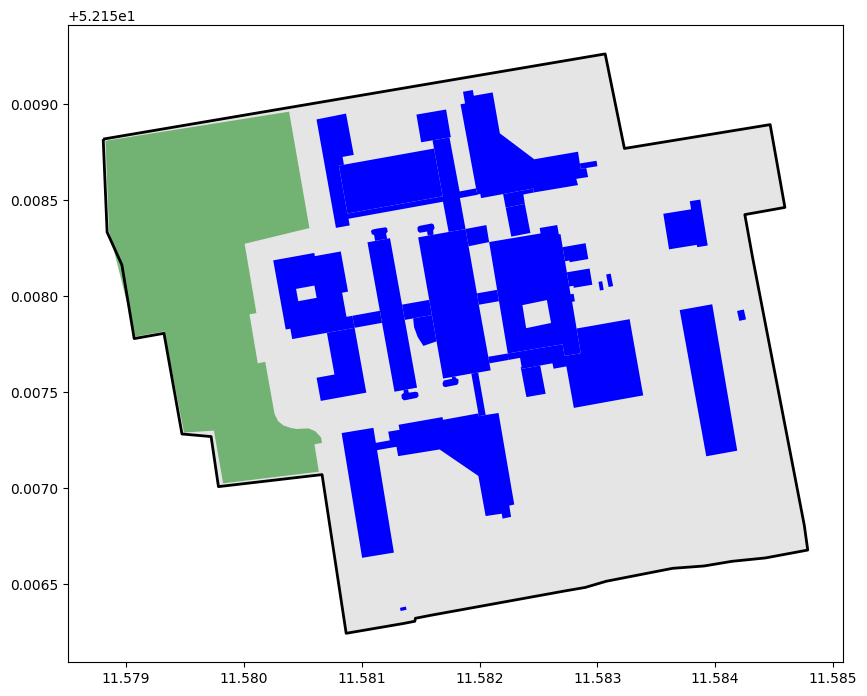

In [12]:
import osmnx as ox
import matplotlib.pyplot as plt

# Configure OSMnx to use the new settings module
ox.settings.use_cache = True
ox.settings.log_console = True

# Define the place query and the types of features you're interested in
place_query = "Klinikum Magdeburg, Magdeburg, Germany"

# Tags for buildings and green spaces
building_tags = {"building": True}
green_space_tags = {
    "leisure": "park",
    "landuse": ["grass", "greenfield", "recreation_ground"],
}

# Retrieve OSM features from the specified place for both buildings and green spaces
try:
    # This will return a GeoDataFrame of all buildings within the boundaries of the place
    buildings_gdf = ox.features_from_place(place_query, building_tags)

    # This will return a GeoDataFrame of green spaces within the boundaries of the place
    green_spaces_gdf = ox.features_from_place(place_query, green_space_tags)

    # Create a figure and one subplot
    fig, ax = plt.subplots(figsize=(10, 10))

    hospital.plot(
        ax=ax, color="grey", alpha=0.2
    )  # You can adjust the alpha for desired transparency

    # Get the boundary of the hospital grounds
    hospital_boundary = hospital.geometry.boundary

    # Plot the boundary of the hospital on the map
    hospital_boundary.plot(ax=ax, color="black", linewidth=2)

    # Plot the green spaces first, in green
    green_spaces_gdf.plot(
        ax=ax, color="green", alpha=0.5
    )  # Adjust alpha for transparency

    # Plot the buildings on top, in blue
    buildings_gdf.plot(ax=ax, color="blue")

    # Show the plot
    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")

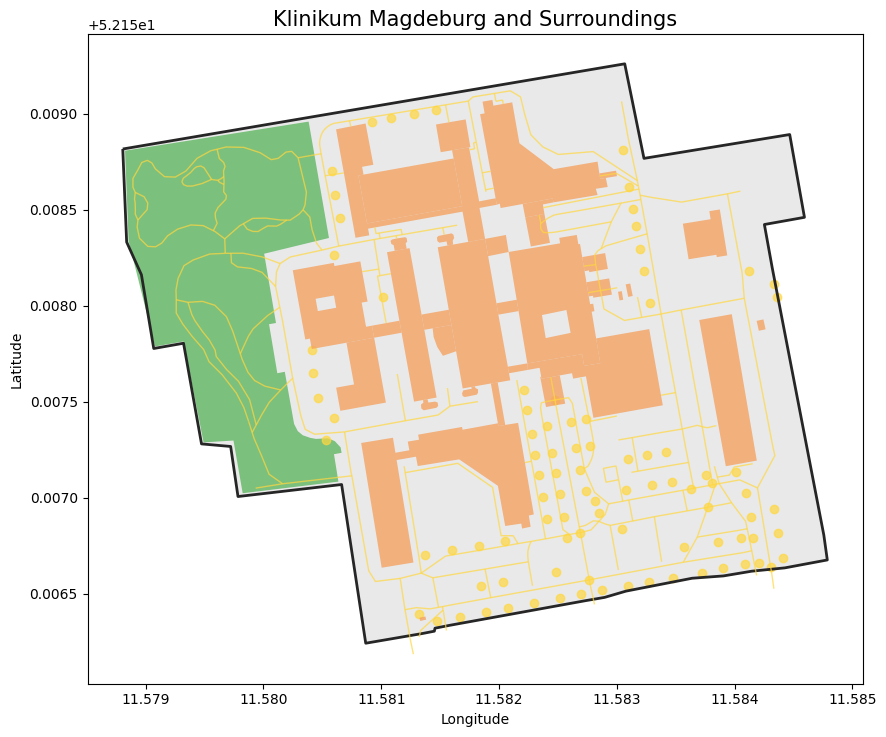

In [22]:
import osmnx as ox
import matplotlib.pyplot as plt

# Configure OSMnx to use the new settings module
ox.settings.use_cache = True
ox.settings.log_console = True

# Define the place query and the types of features you're interested in
place_query = "Klinikum Magdeburg, Magdeburg, Germany"

# Tags for various elements
building_tags = {"building": True}
green_space_tags = {
    "leisure": "park",
    "landuse": ["grass", "greenfield", "recreation_ground"],
}
road_tags = {"highway": True}

# Retrieve OSM features from the specified place for all elements
try:
    buildings_gdf = ox.features_from_place(place_query, building_tags)
    green_spaces_gdf = ox.features_from_place(place_query, green_space_tags)
    roads_gdf = ox.features_from_place(place_query, road_tags)

    # Create a figure and one subplot
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot the hospital area
    hospital.plot(
        ax=ax, color="#e0e0e0", alpha=0.7
    )  # Area inside the hospital boundary, light grey

    # Plot the hospital boundary
    hospital_boundary = hospital.geometry.boundary
    hospital_boundary.plot(ax=ax, color="#262626", linewidth=2)  # Boundary in dark grey

    # Plot green spaces
    green_spaces_gdf.plot(
        ax=ax, color="#4caf50", alpha=0.7
    )  # Green spaces in a vivid green

    # Plot roads
    roads_gdf.plot(
        ax=ax, color="#ffd740", linewidth=1, alpha=0.7
    )  # Roads in a soft yellow

    # Plot buildings
    buildings_gdf.plot(
        ax=ax, color="#f4a261", alpha=0.8
    )  # Buildings in a darker shade of green

    # Final touches
    ax.axis("on")
    ax.set_title("Klinikum Magdeburg and Surroundings", fontsize=15)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

    # Show the plot
    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")

In [26]:
import osmnx as ox
import matplotlib.pyplot as plt

# Configure OSMnx settings
ox.settings.use_cache = True
ox.settings.log_console = True

# Define the place query
place_query = "Klinikum Magdeburg, Magdeburg, Germany"

# Tags for various elements
tags = {"building": True, "leisure": True, "landuse": True, "highway": True}

# Retrieve OSM features from the specified place for all elements
try:
    # Get all features for the area and filter out nodes (which may include the yellow points)
    gdf = ox.geometries_from_place(place_query, tags)
    # Filter polygons for buildings
    buildings_gdf = gdf[(gdf["geometry"].type == "Polygon") & (gdf["building"] == True)]
    # Filter polygons for green spaces and roads, checking if the columns exist
    if "leisure" in gdf.columns or "landuse" in gdf.columns:
        green_spaces_gdf = gdf[
            (gdf["geometry"].type == "Polygon")
            & (
                gdf["leisure"].isin(["park", "pitch", "playground"])
                | gdf["landuse"].isin(["grass", "greenfield", "recreation_ground"])
            )
        ]
    if "highway" in gdf.columns:
        roads_gdf = gdf[
            (gdf["geometry"].type == "LineString") & gdf["highway"].notnull()
        ]

    # Retrieve the specific parking area by OSM ID and filter by Polygon type
    parking_id = 609162067
    parking_gdf = ox.geometries_from_osmids([parking_id])
    parking_polygons_gdf = parking_gdf[parking_gdf["geometry"].type == "Polygon"]

    # Create a figure and one subplot
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plotting elements conditionally, checking if they exist
    if "leisure" in gdf.columns or "landuse" in gdf.columns:
        green_spaces_gdf.plot(
            ax=ax, color="#4caf50", alpha=0.7
        )  # Vivid green for green spaces
    if "highway" in gdf.columns:
        roads_gdf.plot(
            ax=ax, color="#ffd740", linewidth=1, alpha=0.7
        )  # Soft yellow for roads
    buildings_gdf.plot(ax=ax, color="#f4a261", alpha=0.8)  # Sandy color for buildings

    # Plot the specific parking area in grey if it exists
    if not parking_polygons_gdf.empty:
        parking_polygons_gdf.plot(
            ax=ax, color="#808080", alpha=0.7
        )  # Grey for the specific parking area

    # Final touches
    ax.axis("on")
    ax.set_title("Klinikum Magdeburg and Surroundings", fontsize=15)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

    # Show the plot
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

/tmp/ipykernel_63289/1571885216.py:22: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf = ox.geometries_from_place(place_query, tags)


An error occurred: 'landuse'


In [24]:
import osmnx as ox
import json

# Configure OSMnx to use the new settings module
ox.settings.use_cache = True
ox.settings.log_console = True

# Define the place query and the types of features you're interested in
place_query = "Klinikum Magdeburg, Magdeburg, Germany"
tags = {
    "building": True,
    "leisure": True,
    "landuse": True,
    "highway": True,
    "natural": True,
}

# Attempt to retrieve OSM features from the specified place
try:
    gdf = ox.geometries_from_place(place_query, tags)
    # Check if the GeoDataFrame is empty
    if not gdf.empty:
        # Convert the GeoDataFrame to GeoJSON format
        geojson_data = gdf.to_json()

        # Save the GeoJSON data to a file
        with open("hospital_osm_data.json", "w") as outfile:
            json.dump(geojson_data, outfile)
        print("GeoJSON data saved successfully.")
    else:
        print("No data found for the specified tags and place query.")

except Exception as e:
    print(f"An error occurred: {e}")

/tmp/ipykernel_63289/418073394.py:20: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf = ox.geometries_from_place(place_query, tags)


GeoJSON data saved successfully.
